<a href="https://colab.research.google.com/github/santiagoroncancio/ComputationalSimulation/blob/master/Labs/Lab3/Lab3_G_G_1_3741.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
%matplotlib inline 

import numpy as np
import math
import random as rn

In [94]:
tamXi = 10000
res = []

In [95]:
def gencongru1(): 
    global Xant1
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    vlambda = 7
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)

def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 

In [96]:
for i in range(tamXi):
  Xant1 = rn.randrange(987654321)
  Xant2 = rn.randrange(123987456)

  M = 99999.0
  T = 20.0
  at = []
  an = []
  LLt = []
  St = []

  t = tsuc = NLL = NS = n = 0

  at.append(t)
  an.append(n)

  TSuc = {"tLL":M, "tS":M}

  LL = []
  S = []
  Serv = []
  LL.append(0.0)
  S.append(0.0)
  Serv.append(0.0)

  X = GenerarX()

  if X > T:
      Tp = t_med_sistema = t_med_cola = 0.0
      exit
  else:
      Llegada(X)
      while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
          if TSuc['tLL'] < TSuc['tS']:
              tsuc = TSuc['tLL']
              TSuc['tLL'] = M
              Llegada(tsuc)
              
          if TSuc['tS'] < TSuc['tLL']:
              tsuc = TSuc['tS']
              TSuc['tS'] = M
              Servidor(tsuc)

      Tp = max(0,t-T)
      acumulo1 = acumulo2 = 0.0
      ind = 0
      
      while ind < NLL:
          acumulo1 = acumulo1 + S[ind] - LL[ind]
          acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
          ind = ind + 1
      t_med_sistema = acumulo1/NLL
      t_med_cola = acumulo2/NLL

      exit

  an = np.array(an)
  
  res.append([t_med_sistema, t_med_cola, Tp, max(an), NLL])

  #print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
  #print("Tiempo medio de los clientes en la cola: ",t_med_cola)
  #print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
  #print("Número máximo de clientes en el sistema: ",max(an))
  #print("Total de clientes que pasaron por el sistema: ",NLL)

#Laboratorio 3
Usando la implementación de ejemplo del sistema de línea de espera con un servidor (Modelo de colas G/G/1) en Notebook Jupyter, implementar:
1. La medida de desempeño de tiempo promedio en fila de los clientes (Xi) para una corrida de simulación i .

2. Implementar el método recursivo para calcular la media de la muestra y la varianza de la muestra.

3. Calcular la media de la muestra (sample mean) y la varianza de la muestra (sample variance) para:
  - k=100 simulaciones.
  - k=1000 simulaciones.
  - k=10000 simulaciones.

In [97]:
#sample Mean 
def sampleMean(tam, lista):
  listAux = []
  for i in range(tam):
    if i == 0 : 
      aux = lista[0][1]
    else:
      aux = listAux[i-1]+(lista[i][1]-listAux[i-1])/i
    
    listAux.append(aux)
  return listAux

#Sample Variance
def sampleVariance(tam, lista, listMean):
  listAux = []
  for i in range(tam):
    if i == 0:
      aux = 0
    else:
      aux = (1-(1/i-1))*listAux[i-1] + i * (listMean[i] - listMean[i-1])**2

    listAux.append(aux)
  return listAux

In [98]:
k = 100
listMean = sampleMean(k, res)
listVariance = sampleVariance(k, res, listMean)

print("K 100 --> Mean ",listMean[k-1]," variance ",listVariance[k-1])

k = 1000
listMean = sampleMean(k, res)
listVariance = sampleVariance(k, res, listMean)

print("K 1000 --> Mean ",listMean[k-1]," variance ",listVariance[k-1])

k = 10000
listMean = sampleMean(k, res)
listVariance = sampleVariance(k, res, listMean)

print("K 10000 --> Mean ",listMean[k-1]," variance ",listVariance[k-1])

K 100 --> Mean  0.09770848175667567  variance  1.32204850181235e+26
K 1000 --> Mean  0.09994521206071433  variance  3.5218621021993426e+296
K 10000 --> Mean  0.09933263353789062  variance  inf


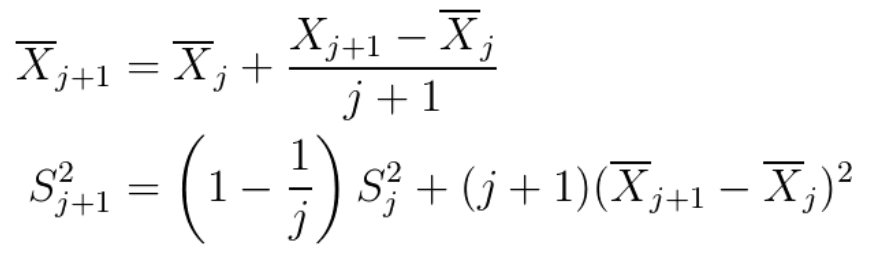